In [15]:
import config as config
import os
import pandas as pd
import geopandas as gpd
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline
sns.set(rc={'figure.dpi': 150})
sns.set(rc={"figure.figsize": (6, 3)})
sns.set_style("white")

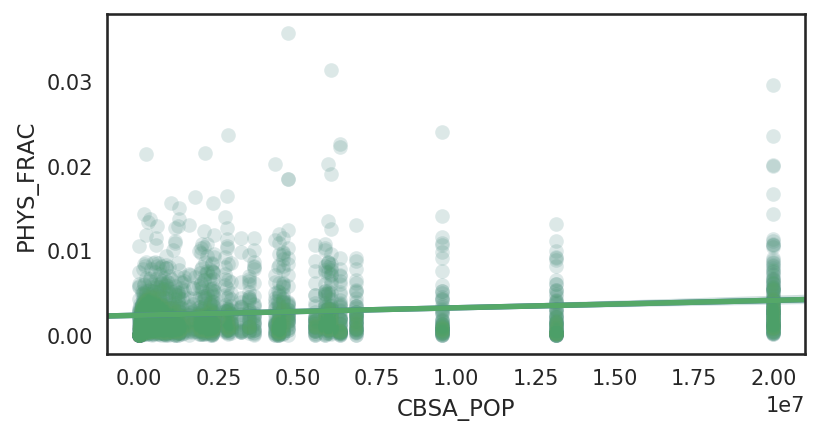

In [32]:
puma_int = pd.read_csv(
    os.path.join(config.temp_dir, str(config.spatial_year) + '_puma_int_final.csv'))
puma_int.fillna(0, inplace = True)

puma_int["UR"] = pd.cut(puma_int['CBSA_POP'], 
                        bins = [0, 1, 5e5, 1e6, 5e6, 1e8], include_lowest = True,
                        labels = ["Rural", "500k", "1M", "5M", "BIG"])

sns.regplot(data = puma_int, x = "CBSA_POP", y = "PHYS_FRAC", scatter_kws = {"alpha" : 0.1})

In [30]:
puma_int['UR'] = pd.cut(puma_int['CBSA_POP'], 
                        bins = [0, 1, 5e5, 1e6, 5e6, 1e8], include_lowest = True,
                        labels = ['Rural', '500k', '1M', '5M', 'BIG'])

res = {}
for x in ['PHYS', 'PA', 'PHARM', 'DENTIST', 'NURSE']:
    formula = x + '_FRAC ~ C(STATE) + UR'
    ols = smf.wls(formula = formula, data = puma_int, weights = puma_int['POP'])
    model = ols.fit()

    res[x] = {'Rural (Int.)' : model.params['Intercept'],
              '< 500k' : model.params['UR[T.500k]'], 
              '< 1M'   : model.params['UR[T.1M]'], 
              '< 5M'   : model.params['UR[T.5M]'], 
              '> 5M'   : model.params['UR[T.BIG]'],
              'RuralFrac' : model.params['Intercept']/((puma_int[x + '_FRAC'] * puma_int['POP']).sum() / puma_int['POP'].sum())
             }
    
puma_int_reg = pd.DataFrame(res)
puma_int_reg

,DENTIST,NURSE,PA,PHARM,PHYS
< 1M,0.000053,0.000671,-0.000010,0.000298,0.001151
< 500k,0.000032,0.000607,-0.000011,0.000184,0.000796
< 5M,0.000115,0.001054,0.000023,0.000426,0.001662
> 5M,0.000213,-0.000007,0.000013,0.000386,0.001916
Rural (Int.),0.000323,0.010589,0.000311,0.000959,0.001086
RuralFrac,0.630311,1.069506,0.877353,1.072117,0.402663


In [31]:
puma_int['UR'] = pd.cut(puma_int['CBSA_POP'], 
                        bins = [0, 1e4, 5e4, 2.5e6, 1e8], include_lowest = True,
                        labels = ['Rural', 'Micro', 'Metro', 'Big'])

res = {}
for x in ['PHYS', 'PA', 'PHARM', 'DENTIST', 'NURSE']:
    formula = x + '_FRAC ~ C(STATE) + UR'
    ols = smf.wls(formula = formula, data = puma_int, weights = puma_int['POP'])
    model = ols.fit()

    res[x] = {'Rural (Int.)' : model.params['Intercept'],
              '< 10k' : model.params['UR[T.Micro]'], 
              '< 50k'   : model.params['UR[T.Metro]'], 
              '> 2.5M'   : model.params['UR[T.Big]'],
              'RuralFrac' : model.params['Intercept']/((puma_int[x + '_FRAC'] * puma_int['POP']).sum() / puma_int['POP'].sum())
             }
    
puma_int_reg2 = pd.DataFrame(res)
puma_int_reg2

,DENTIST,NURSE,PA,PHARM,PHYS
< 10k,-0.000072,-0.000492,-0.000118,0.000058,-0.000086
< 50k,0.000059,0.000803,0.000002,0.000272,0.001080
> 2.5M,0.000172,0.000392,0.000020,0.000393,0.001917
Rural (Int.),0.000320,0.010527,0.000308,0.000943,0.001058
RuralFrac,0.625476,1.063262,0.870277,1.053866,0.392507


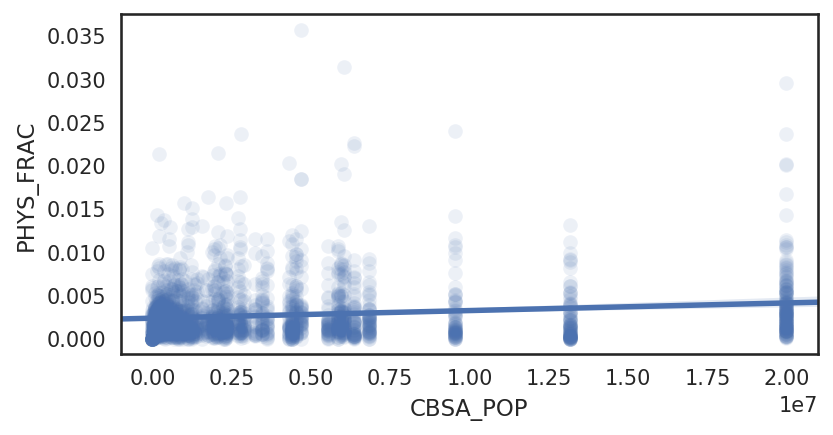

In [33]:
puma_pip = pd.read_csv(
    os.path.join(config.temp_dir, str(config.spatial_year) + '_puma_pip_final.csv'))
puma_pip.fillna(0, inplace = True)

puma_pip["UR"] = pd.cut(puma_pip['CBSA_POP'], 
                        bins = [0, 1, 5e5, 1e6, 5e6, 1e8], include_lowest = True,
                        labels = ["Rural", "500k", "1M", "5M", "BIG"])

sns.regplot(data = puma_int, x = "CBSA_POP", y = "PHYS_FRAC", scatter_kws = {"alpha" : 0.1})

In [34]:
puma_pip['UR'] = pd.cut(puma_pip['CBSA_POP'], 
                        bins = [0, 1, 5e5, 1e6, 5e6, 1e8], include_lowest = True,
                        labels = ['Rural', '500k', '1M', '5M', 'BIG'])

res = {}
for x in ['PHYS', 'PA', 'PHARM', 'DENTIST', 'NURSE']:
    formula = x + '_FRAC ~ C(STATE) + UR'
    ols = smf.wls(formula = formula, data = puma_pip, weights = puma_pip['POP'])
    model = ols.fit()

    res[x] = {'Rural (Int.)' : model.params['Intercept'],
              '< 500k' : model.params['UR[T.500k]'], 
              '< 1M'   : model.params['UR[T.1M]'], 
              '< 5M'   : model.params['UR[T.5M]'], 
              '> 5M'   : model.params['UR[T.BIG]'],
              'RuralFrac' : model.params['Intercept']/((puma_pip[x + '_FRAC'] * puma_pip['POP']).sum() / puma_pip['POP'].sum())
             }
    
puma_pip_reg = pd.DataFrame(res)
puma_pip_reg

,DENTIST,NURSE,PA,PHARM,PHYS
< 1M,0.000098,0.000606,0.000070,0.000177,0.001219
< 500k,0.000090,0.000555,0.000062,0.000052,0.000809
< 5M,0.000176,0.000953,0.000107,0.000321,0.001832
> 5M,0.000266,-0.000069,0.000086,0.000277,0.001972
Rural (Int.),0.000282,0.010749,0.000248,0.001106,0.001201
RuralFrac,0.551357,1.085668,0.698765,1.236986,0.445559


In [35]:
puma_pip['UR'] = pd.cut(puma_pip['CBSA_POP'], 
                        bins = [0, 1e4, 5e4, 2.5e6, 1e8], include_lowest = True,
                        labels = ['Rural', 'Micro', 'Metro', 'Big'])

res = {}
for x in ['PHYS', 'PA', 'PHARM', 'DENTIST', 'NURSE']:
    formula = x + '_FRAC ~ C(STATE) + UR'
    ols = smf.wls(formula = formula, data = puma_pip, weights = puma_pip['POP'])
    model = ols.fit()

    res[x] = {'Rural (Int.)' : model.params['Intercept'],
              '< 10k' : model.params['UR[T.Micro]'], 
              '< 50k'   : model.params['UR[T.Metro]'], 
              '> 2.5M'   : model.params['UR[T.Big]'],
              'RuralFrac' : model.params['Intercept']/((puma_pip[x + '_FRAC'] * puma_pip['POP']).sum() / puma_pip['POP'].sum())
             }
    
puma_pip_reg2 = pd.DataFrame(res)
puma_pip_reg2

,DENTIST,NURSE,PA,PHARM,PHYS
< 10k,-0.000009,-0.000368,-0.000009,-0.000183,0.000017
< 50k,0.000124,0.000776,0.000084,0.000178,0.001231
> 2.5M,0.000235,0.000293,0.000093,0.000292,0.001999
Rural (Int.),0.000276,0.010689,0.000242,0.001069,0.001102
RuralFrac,0.539943,1.079599,0.683437,1.195098,0.408858
